# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [3]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [4]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [5]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [7]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 )

In [8]:
# Print the sizes of the splits to confirm
print("Training set size (X):", X_train.shape)
print("Testing set size (X):", X_test.shape)
print("Training set size (y):", y_train.shape)
print("Testing set size (y):", y_test.shape)

Training set size (X): (404, 13)
Testing set size (X): (102, 13)
Training set size (y): (404,)
Testing set size (y): (102,)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model 
model.fit(X_train, y_train)

# Generate the predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

## 3. Calculate and print R-squared for both the training and the testing set.

In [10]:
# Evaluate the model
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print("Training Set Evaluation:")
print(f"R-squared (R2): {train_r2}")

print("\nTesting Set Evaluation:")
print(f"R-squared (R2): {test_r2}")

Training Set Evaluation:
R-squared (R2): 0.7508856358979673

Testing Set Evaluation:
R-squared (R2): 0.6687594935356296


## 4. Calculate and print mean squared error for both the training and the testing set.

In [11]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print evaluation metrics
print("Training Set Evaluation:")
print(f"Mean Squared Error (MSE): {train_mse}")

print("\nTesting Set Evaluation:")
print(f"Mean Squared Error (MSE): {test_mse}")

Training Set Evaluation:
Mean Squared Error (MSE): 21.641412753226312

Testing Set Evaluation:
Mean Squared Error (MSE): 24.29111947497369


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [12]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error for the training set
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate Mean Absolute Error for the testing set
test_mae = mean_absolute_error(y_test, y_test_pred)

# Print the Mean Absolute Error for both sets
print("Training Set Mean Absolute Error (MAE):", train_mae)
print("Testing Set Mean Absolute Error (MAE):", test_mae)

Training Set Mean Absolute Error (MAE): 3.3147716267832283
Testing Set Mean Absolute Error (MAE): 3.189091965887865


## Classification Model Evaluation

In [13]:
from sklearn.datasets import load_iris
data = load_iris()

In [15]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [16]:
column_names = data.feature_names

In [17]:
df = pd.DataFrame(data['data'],columns=column_names)

In [18]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [19]:
target = pd.DataFrame(data.target)

In [20]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [22]:
from sklearn.model_selection import train_test_split

# Combine features and target into a single DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['class'] = data['target']

# Separate
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Print the shapes of the resulting splits
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

Training features shape: (120, 4)
Testing features shape: (30, 4)
Training target shape: (120,)
Testing target shape: (30,)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=200)

# Train the model on the training data
model.fit(X_train, y_train)

# Generate predictions for the training set
y_train_pred = model.predict(X_train)

# Generate predictions for the testing set
y_test_pred = model.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [25]:
# Evaluate the model's performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

# Print a classification report for more detailed performance metrics
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred, target_names=data['target_names']))

Training Accuracy: 0.975
Testing Accuracy: 1.0

Classification Report (Test Set):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [26]:

from sklearn.metrics import balanced_accuracy_score

# Calculate balanced accuracy for the training set
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred)

# Calculate balanced accuracy for the testing set
test_balanced_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Print the balanced accuracy scores
print("Training Balanced Accuracy Score:", train_balanced_accuracy)
print("Testing Balanced Accuracy Score:", test_balanced_accuracy)

Training Balanced Accuracy Score: 0.975609756097561
Testing Balanced Accuracy Score: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [27]:
from sklearn.metrics import precision_score

# Calculate precision for the training set
train_precision = precision_score(y_train, y_train_pred, average='weighted')

# Calculate precision for the testing set
test_precision = precision_score(y_test, y_test_pred, average='weighted')

# Print the precision scores
print("Training Precision Score:", train_precision)
print("Testing Precision Score:", test_precision)

Training Precision Score: 0.9767857142857144
Testing Precision Score: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [28]:
from sklearn.metrics import recall_score

# Calculate recall for the training set
train_recall = recall_score(y_train, y_train_pred, average='weighted')

# Calculate recall for the testing set
test_recall = recall_score(y_test, y_test_pred, average='weighted')

# Print the recall scores
print("Training Recall Score:", train_recall)
print("Testing Recall Score:", test_recall)

Training Recall Score: 0.975
Testing Recall Score: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [29]:
from sklearn.metrics import f1_score

# Calculate F1 score for the training set
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

# Calculate F1 score for the testing set
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# Print the F1 scores
print("Training F1 Score:", train_f1)
print("Testing F1 Score:", test_f1)

Training F1 Score: 0.9749882794186592
Testing F1 Score: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

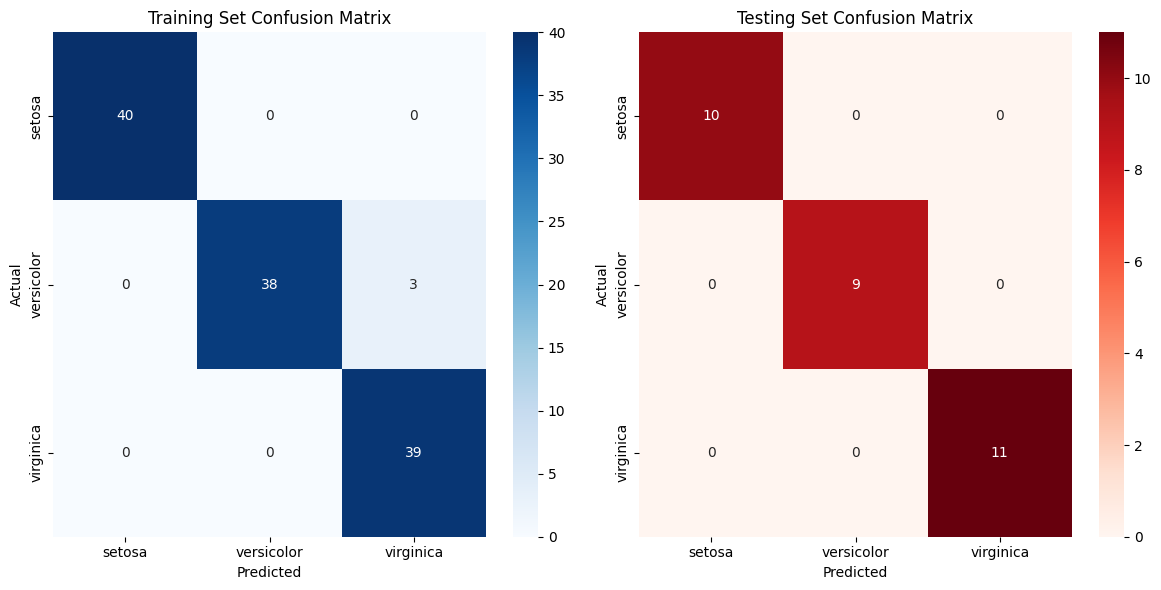

In [31]:
# Generate confusion matrix for the training set
train_cm = confusion_matrix(y_train, y_train_pred)

# Generate confusion matrix for the testing set
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrices
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Training confusion matrix
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names, ax=ax[0])
ax[0].set_title('Training Set Confusion Matrix')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')

# Testing confusion matrix
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Reds', xticklabels=data.target_names, yticklabels=data.target_names, ax=ax[1])
ax[1].set_title('Testing Set Confusion Matrix')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier() # k-Nearest Neighbors

# Train the model
model.fit(X_train, y_train)

 # Generate predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
metrics = {
    "Training Accuracy": accuracy_score(y_train, y_train_pred),
    "Testing Accuracy": accuracy_score(y_test, y_test_pred),
    "Training Precision": precision_score(y_train, y_train_pred, average='weighted'),
    "Testing Precision": precision_score(y_test, y_test_pred, average='weighted'),
    "Training Recall": recall_score(y_train, y_train_pred, average='weighted'),
    "Testing Recall": recall_score(y_test, y_test_pred, average='weighted'),
    "Training F1 Score": f1_score(y_train, y_train_pred, average='weighted'),
    "Testing F1 Score": f1_score(y_test, y_test_pred, average='weighted'),
    "Training Confusion Matrix": confusion_matrix(y_train, y_train_pred),
    "Testing Confusion Matrix": confusion_matrix(y_test, y_test_pred)
}

In [33]:

print('Print evaluation metrics for "KNeighborsClassifier"')
# Print each key and value
for key, value in metrics.items():
    print(f"  {key}: ", end='')
    if isinstance(value, (list, tuple, dict)):
        # Handle complex data structures
        print(value)
    elif isinstance(value, (int, float)):
        # Format numeric values to 4 decimal places
        print(f"{value:.4f}")
    else:
        # Print other types directly
        print()
        print(value)

    if "Testing" in key:
        print()

Print evaluation metrics for "KNeighborsClassifier"
  Training Accuracy: 0.9667
  Testing Accuracy: 1.0000

  Training Precision: 0.9675
  Testing Precision: 1.0000

  Training Recall: 0.9667
  Testing Recall: 1.0000

  Training F1 Score: 0.9667
  Testing F1 Score: 1.0000

  Training Confusion Matrix: 
[[40  0  0]
 [ 0 38  3]
 [ 0  1 38]]
  Testing Confusion Matrix: 
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

